# Abstract
State notebook purpose here

The idea of this notebook is to explore relationships among dataset variables. This is helpful to get a better taste of how data were generated and the their physical meaning.

## Read Data
Read/Import data here

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import awkward as ak

# Options for pandas
# pd.options.display.max_columns = 50
# pd.options.display.max_rows = 30
pd.options.display.float_format = '{:,.4f}'.format
pd.pandas.set_option('display.max_columns', None)

REPO_PATH = Path().absolute().parent.parent
DATA_PATH = REPO_PATH / "pnet_data/rho_full"

In [2]:
pdgid_map = {
    -213: 'ρ(770)-',
    213: 'ρ(770)+',
    211: 'π+',
    -211: 'π-',
    111: 'π0',
    22: 'γ',
    -11: 'e-',
    11: 'e+'
}

status_map = {1: 'hit', 2: 'decay'}

In [3]:
### SINGLERHO: OLD DATA

# events_folder = [fn.name for fn in DATA_PATH.iterdir()][0]
# file_chunks = [fn.name for fn in (DATA_PATH / events_folder).iterdir()]

# print(f"Found {len(file_chunks)} chunks\n\n")

# chunk_keys_num = list()
# for i, chunk_name in enumerate(file_chunks):
#     chunk_data = uproot.open(DATA_PATH / events_folder / chunk_name)
#     chunk_keys_num.append(len(list(chunk_data.keys())))
#     print(f"Chunk {i=}; existing keys: {chunk_data.keys()}")

# print(
#     f"The distribution of keys per event is the following: [value, count]\n\n{np.array(np.unique(chunk_keys_num, return_counts=True)).T}"
# )

In [4]:
### RHO_FULL: NEW DATA
import awkward as ak

selected_cols = [
    #  'runNumber', # always fixed
    'eventNumber',
    #  'lumiBlock', # not interesting?
    #  'coreFlags', # always fixed
    #  'mcEventNumber', # not interesting?
    #  'mcChannelNumber', # always fixed
    #  'mcEventWeight', # always fixed
    'nTruthPart',
    #  'G4PreCalo_n_EM', # not interesting?
    #  'G4PreCalo_E_EM', # not interesting?
    #  'G4PreCalo_n_Had', # not interesting?
    #  'G4PreCalo_E_Had', # not interesting?
    #  'truthVertexX', # very narrow distribution: sigma<10e-2
    #  'truthVertexY', # very narrow distribution: sigma<10e-2
    #  'truthVertexZ', # very narrow distribution: sigma~0.36
    'truthPartPdgId',
    'truthPartStatus',
    #  'truthPartBarcode', # not interesting? --> it has multiple list values though
    'truthPartPt',
    'truthPartE',
    'truthPartMass',
    'truthPartEta',
    'truthPartPhi',
    'nTrack',
    'trackPt',
    'trackP',
    'trackMass',
    'trackEta',
    'trackPhi',
    'trackTruthParticleIndex',
    'trackVisibleCalHitCaloEnergy',  # not interesting?
    'trackFullCalHitCaloEnergy',  # not interesting?
    'trackSubtractedCaloEnergy',  # not interesting?
    #  'trackNumberOfPixelHits', # not interesting?
    #  'trackNumberOfSCTHits', # not interesting?
    #  'trackNumberOfPixelDeadSensors', # not interesting?
    #  'trackNumberOfSCTDeadSensors', # not interesting?
    #  'trackNumberOfPixelSharedHits', # not interesting?
    #  'trackNumberOfSCTSharedHits', # not interesting?
    #  'trackNumberOfPixelHoles', # not interesting?
    #  'trackNumberOfSCTHoles', # not interesting?
    #  'trackNumberOfInnermostPixelLayerHits', # not interesting?
    #  'trackNumberOfNextToInnermostPixelLayerHits', # not interesting?
    #  'trackExpectInnermostPixelLayerHit', # not interesting?
    #  'trackExpectNextToInnermostPixelLayerHit', # not interesting?
    #  'trackNumberOfTRTHits', # not interesting?
    #  'trackNumberOfTRTOutliers', # not interesting?
    #  'trackChiSquared', # not interesting?
    #  'trackNumberDOF', # not interesting?
    'trackD0',
    'trackZ0',
    #  'trackEta_PreSamplerB',
    #  'trackPhi_PreSamplerB',
    #  'trackEta_PreSamplerE',
    #  'trackPhi_PreSamplerE',
    #  'trackEta_EMB1',
    #  'trackPhi_EMB1',
    #  'trackEta_EMB2',
    #  'trackPhi_EMB2',
    #  'trackEta_EMB3',
    #  'trackPhi_EMB3',
    #  'trackEta_EME1',
    #  'trackPhi_EME1',
    #  'trackEta_EME2',
    #  'trackPhi_EME2',
    #  'trackEta_EME3',
    #  'trackPhi_EME3',
    #  'trackEta_HEC0',
    #  'trackPhi_HEC0',
    #  'trackEta_HEC1',
    #  'trackPhi_HEC1',
    #  'trackEta_HEC2',
    #  'trackPhi_HEC2',
    #  'trackEta_HEC3',
    #  'trackPhi_HEC3',
    #  'trackEta_TileBar0',
    #  'trackPhi_TileBar0',
    #  'trackEta_TileBar1',
    #  'trackPhi_TileBar1',
    #  'trackEta_TileBar2',
    #  'trackPhi_TileBar2',
    #  'trackEta_TileGap1',
    #  'trackPhi_TileGap1',
    #  'trackEta_TileGap2',
    #  'trackPhi_TileGap2',
    #  'trackEta_TileGap3',
    #  'trackPhi_TileGap3',
    #  'trackEta_TileExt0',
    #  'trackPhi_TileExt0',
    #  'trackEta_TileExt1',
    #  'trackPhi_TileExt1',
    #  'trackEta_TileExt2',
    #  'trackPhi_TileExt2',
    'nCluster',
    'cluster_E',
    'cluster_E_LCCalib',
    'cluster_Pt',
    'cluster_Eta',
    'cluster_Phi',
    'cluster_nCells',
    #     'cluster_ENG_CALIB_TOT', # always -1
    #     'cluster_ENG_CALIB_OUT_T', # always -1
    #     'cluster_ENG_CALIB_DEAD_TOT', # always -1
    'cluster_EM_PROBABILITY',
    #  'cluster_HAD_WEIGHT', # not interesting?
    #  'cluster_OOC_WEIGHT', # not interesting?
    #  'cluster_DM_WEIGHT', # not interesting?
    #  'cluster_CENTER_MAG', # not interesting?
    #  'cluster_FIRST_ENG_DENS', # not interesting?
    #  'cluster_CENTER_LAMBDA', # not interesting?
    #  'cluster_ISOLATION', # not interesting?
    #  'cluster_ENERGY_DigiHSTruth', # not interesting?
    'cluster_cell_ID',
    'cluster_cell_E',
    'cluster_cell_hitsE_EM',
    'cluster_cell_hitsE_nonEM',
    'cluster_cell_hitsE_Invisible',
    'cluster_cell_hitsE_Escaped',
    'cluster_fullHitsTruthIndex',
    'cluster_fullHitsTruthE',
    'cluster_visibleHitsTruthIndex',  # same as fullHitsTruthIndex
    'cluster_visibleHitsTruthE',
    'cluster_cell_hitsTruthIndex',
    'cluster_cell_hitsTruthE'
]

events_file = uproot.open(DATA_PATH / "rho_full.root")
events = ak.to_dataframe(next(
    events_file["EventTree"].iterate(step_size="250 MB")),
                         how='inner')[selected_cols]  # exploded
# cellgeo_data = uproot.open(DATA_PATH / "cell_geo.root")  # calorimeter geometry information

In [5]:
# CaloSample = {
#     "PreSamplerB": 0,
#     "EMB1": 1,
#     "EMB2": 2,
#     "EMB3": 3,
#     "LAr": 4,
#     #     "barrel": 5,
#     "PreSamplerE": 6,
#     "EME1": 7,
#     "EME2": 8,
#     "EME3": 9,
#     #     "LAr": 10,  # ?? repeated
#     "EM": 11,
#     #     "endcap": 12,
#     "HEC0": 13,
#     "HEC1": 14,
#     "HEC2": 15,
#     "HEC3": 16,
#     #     "Hadronic end cap cal.": 17,
#     "TileBar0": 18,
#     "TileBar1": 19,
#     "TileBar2": 20,
#     # Tile barrel
#     "TileGap1": 21,
#     "TileGap2": 22,
#     "TileGap3": 23,
#     #     "Tile gap (ITC & scint)": 25,
#     "TileExt0": 26,
#     "TileExt1": 27,
#     "TileExt2": 28,
#     #     "Tile extended barrel
#     "FCAL0": 29,
#     "FCAL1": 30,
#     "FCAL2": 31,
#     #     "Forward EM endcap Unknown": 31
# }

# CaloSample = {k: i for k, i in enumerate(CaloSample.keys())}
# # CaloSample

# # chunk_data["EventTree"].arrays(["nCluster", "m_cluster_cell_centerCellLayer"], library="pd")

In [6]:
# chunk_data["EventTree"].typenames()

In [7]:
# selected_cols = [
#     "eventNumber",
#     "pdgId",
#     "nTruthPart",
#     "truthPartPt",
#     "truthPartE",
#     "truthPartEta",
#     "truthPartPhi",
#     "nTrack",
#     "trackPt",
#     "trackEta",
#     "trackPhi",
#     "clusterPt",
#     "clusterE",
#     "clusterEta",
#     "clusterPhi",
#     'cluster_cell_dR_min',
#     'cluster_cell_dR_max',
#     'cluster_cell_dEta_min',
#     'cluster_cell_dEta_max',
#     'cluster_cell_dPhi_min',
#     'cluster_cell_dPhi_max',
#     'm_cluster_cell_centerCellEta',
#     'm_cluster_cell_centerCellPhi',
#     'm_cluster_cell_centerCellLayer',
# ]

# events = chunk_data["EventTree"].arrays(selected_cols, library="pd")

# to_cast_cols = [
#     col for col in events.columns if isinstance(events[col][0], ak.Array)
# ]

# events[to_cast_cols] = events[to_cast_cols].map(lambda x: ak.to_list(x))

# events.dtypes

In [8]:
truth_cols = [
    "truthPartPdgId",
    "truthPartPt",
    "truthPartE",
    #     "truthPartMass",
    "truthPartEta",
    "truthPartPhi",
]
truth_df = events[selected_cols[:1] + truth_cols]  #.explode(truth_cols)

truth_df

eventNumber  truthPartPdgId  \
entry subentry subsubentry subsubsubentry                                
1     0        0           0                      2006            -213   
               1           0                      2006            -213   
2     0        0           0                      2009             213   
                           1                      2009             213   
               1           0                      2009             213   
...                                                ...             ...   
47282 0        1           1                    730641             213   
               2           0                    730641             213   
                           1                    730641             213   
                           2                    730641             213   
47283 0        0           0                    730623             213   

                                           truthPartPt  truthPartE  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                    5.0219     14.6175   
               1           0                    5.0219     14.6175   
2     0        0           0                   30.2001     75.4712   
                           1                   30.2001     75.4712   
               1           0                   30.2001     75.4712   
...                                                ...         ...   
47282 0        1           1                   92.4012    107.2752   
               2           0                   92.4012    107.2752   
                           1                   92.4012    107.2752   
                           2                   92.4012    107.2752   
47283 0        0           0                   25.6338    123.9855   

                                           truthPartEta  truthPartPhi  
entry subentry subsubentry subsubsubentry                              
1     0        0           0                    -1.7197       -1.7833  
               1           0                    -1.7197       -1.7833  
2     0        0           0                     1.5655       -1.2393  
                           1                     1.5655       -1.2393  
               1           0                     1.5655       -1.2393  
...                                                 ...           ...  
47282 0        1           1                    -0.5598        2.8916  
               2           0                    -0.5598        2.8916  
                           1                    -0.5598        2.8916  
                           2                    -0.5598        2.8916  
47283 0        0           0                    -2.2580       -2.8721  

[251113 rows x 6 columns]

In [9]:
events.query("nTrack==1")

eventNumber  nTruthPart  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                      2006           5   
               1           0                      2006           5   
2     0        0           0                      2009           5   
                           1                      2009           5   
               1           0                      2009           5   
...                                                ...         ...   
47282 0        1           1                    730641           5   
               2           0                    730641           5   
                           1                    730641           5   
                           2                    730641           5   
47283 0        0           0                    730623           5   

                                           truthPartPdgId  truthPartStatus  \
entry subentry subsubentry subsubsubentry                                    
1     0        0           0                         -213                2   
               1           0                         -213                2   
2     0        0           0                          213                2   
                           1                          213                2   
               1           0                          213                2   
...                                                   ...              ...   
47282 0        1           1                          213                2   
               2           0                          213                2   
                           1                          213                2   
                           2                          213                2   
47283 0        0           0                          213                2   

                                           truthPartPt  truthPartE  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                    5.0219     14.6175   
               1           0                    5.0219     14.6175   
2     0        0           0                   30.2001     75.4712   
                           1                   30.2001     75.4712   
               1           0                   30.2001     75.4712   
...                                                ...         ...   
47282 0        1           1                   92.4012    107.2752   
               2           0                   92.4012    107.2752   
                           1                   92.4012    107.2752   
                           2                   92.4012    107.2752   
47283 0        0           0                   25.6338    123.9855   

                                           truthPartMass  truthPartEta  \
entry subentry subsubentry subsubsubentry                                
1     0        0           0                      2.0808       -1.7197   
               1           0                      2.0808       -1.7197   
2     0        0           0                      2.9907        1.5655   
                           1                      2.9907        1.5655   
               1           0                      2.9907        1.5655   
...                                                  ...           ...   
47282 0        1           1                      1.8531       -0.5598   
               2           0                      1.8531       -0.5598   
                           1                      1.8531       -0.5598   
                           2                      1.8531       -0.5598   
47283 0        0           0                      4.1978       -2.2580   

                                           truthPartPhi  nTrack  trackPt  \
entry subentry subsubentry subsubsubentry                                  
1     0        0           0                    -1.7833       1   1.5815   
               

In [10]:
track_cols = [
    #     "nTrack",
    "trackPt",
    #     "trackP",
    #     "trackMass",
    "trackEta",
    "trackPhi",
    #     "trackD0",
    #     "trackZ0",
]
track_df = events.query("nTrack==1")[selected_cols[:1] +
                                     track_cols]  #.explode(track_cols)
track_df

eventNumber  trackPt  trackEta  \
entry subentry subsubentry subsubsubentry                                   
1     0        0           0                      2006   1.5815   -1.8406   
               1           0                      2006   1.5815   -1.8406   
2     0        0           0                      2009  22.6757    1.5802   
                           1                      2009  22.6757    1.5802   
               1           0                      2009  22.6757    1.5802   
...                                                ...      ...       ...   
47282 0        1           1                    730641  82.1154   -0.5637   
               2           0                    730641  82.1154   -0.5637   
                           1                    730641  82.1154   -0.5637   
                           2                    730641  82.1154   -0.5637   
47283 0        0           0                    730623  23.9311   -2.2814   

                                           trackPhi  
entry subentry subsubentry subsubsubentry            
1     0        0           0                -1.1950  
               1           0                -1.1950  
2     0        0           0                -1.1829  
                           1                -1.1829  
               1           0                -1.1829  
...                                             ...  
47282 0        1           1                 2.8862  
               2           0                 2.8862  
                           1                 2.8862  
                           2                 2.8862  
47283 0        0           0                -2.8946  

[175010 rows x 4 columns]

In [11]:
cluster_cols = [
    "cluster_E",
    "cluster_Pt",
    "cluster_Eta",
    "cluster_Phi",
    #     "cluster_nCells",
    #     "cluster_sumCellE"
]
cluster_df = events[selected_cols[:1] + cluster_cols]  #.explode(cluster_cols)

cluster_df

eventNumber  cluster_E  cluster_Pt  \
entry subentry subsubentry subsubsubentry                                       
1     0        0           0                      2006     4.7547      1.8501   
               1           0                      2006     4.7547      1.8501   
2     0        0           0                      2009    36.1139     14.1657   
                           1                      2009    36.1139     14.1657   
               1           0                      2009    36.1139     14.1657   
...                                                ...        ...         ...   
47282 0        1           1                    730641    66.2335     57.0186   
               2           0                    730641    66.2335     57.0186   
                           1                    730641    66.2335     57.0186   
                           2                    730641    66.2335     57.0186   
47283 0        0           0                    730623    55.7477     11.3283   

                                           cluster_Eta  cluster_Phi  
entry subentry subsubentry subsubsubentry                            
1     0        0           0                   -1.5968      -2.0150  
               1           0                   -1.5968      -2.0150  
2     0        0           0                    1.5881      -1.2018  
                           1                    1.5881      -1.2018  
               1           0                    1.5881      -1.2018  
...                                                ...          ...  
47282 0        1           1                   -0.5611       2.8779  
               2           0                   -0.5611       2.8779  
                           1                   -0.5611       2.8779  
                           2                   -0.5611       2.8779  
47283 0        0           0                   -2.2762      -2.9032  

[251113 rows x 5 columns]

# Explorative/Data Visualization
Explore and visualize data


First we apply a selection cut and consider only events with:

- exactly one track per event
- at least one cluster

In [12]:
# selection_cut = (truth_df.truthPartEta < 0.6) & (truth_df.truthPartEta < -0.6)
# selected_events = truth_df[selection_cut].eventNumber.unique()
selected_tracks = track_df[~track_df.trackPt.isna()].eventNumber
selected_clusters = cluster_df[~cluster_df.cluster_E.isna()].eventNumber
selected_events = list(set(selected_tracks).intersection(selected_clusters))

## 3D Scatterplot: $\eta, \phi, P_T$ 

The idea is to explore the relationship between the energy/momentum and direction of the particles at truth, track and cluster level.

The expectation is that we should have correlated quantities albeit not exactly same values due to limits of the detector measurement.

Test cases:
 - event= 3376415: 2 truth, 1 track, no cluster

Inspecting event number: 724790
Inspecting event number: 708703
Inspecting event number: 721361
Inspecting event number: 727539
Inspecting event number: 558070
Inspecting event number: 718172
Inspecting event number: 710371
Inspecting event number: 7403
Inspecting event number: 720512
Inspecting event number: 645832
Inspecting event number: 714311
Inspecting event number: 719091
Inspecting event number: 7415
Inspecting event number: 709299
Inspecting event number: 652459
Inspecting event number: 3275
Inspecting event number: 717488
Inspecting event number: 723604
Inspecting event number: 712057
Inspecting event number: 654828


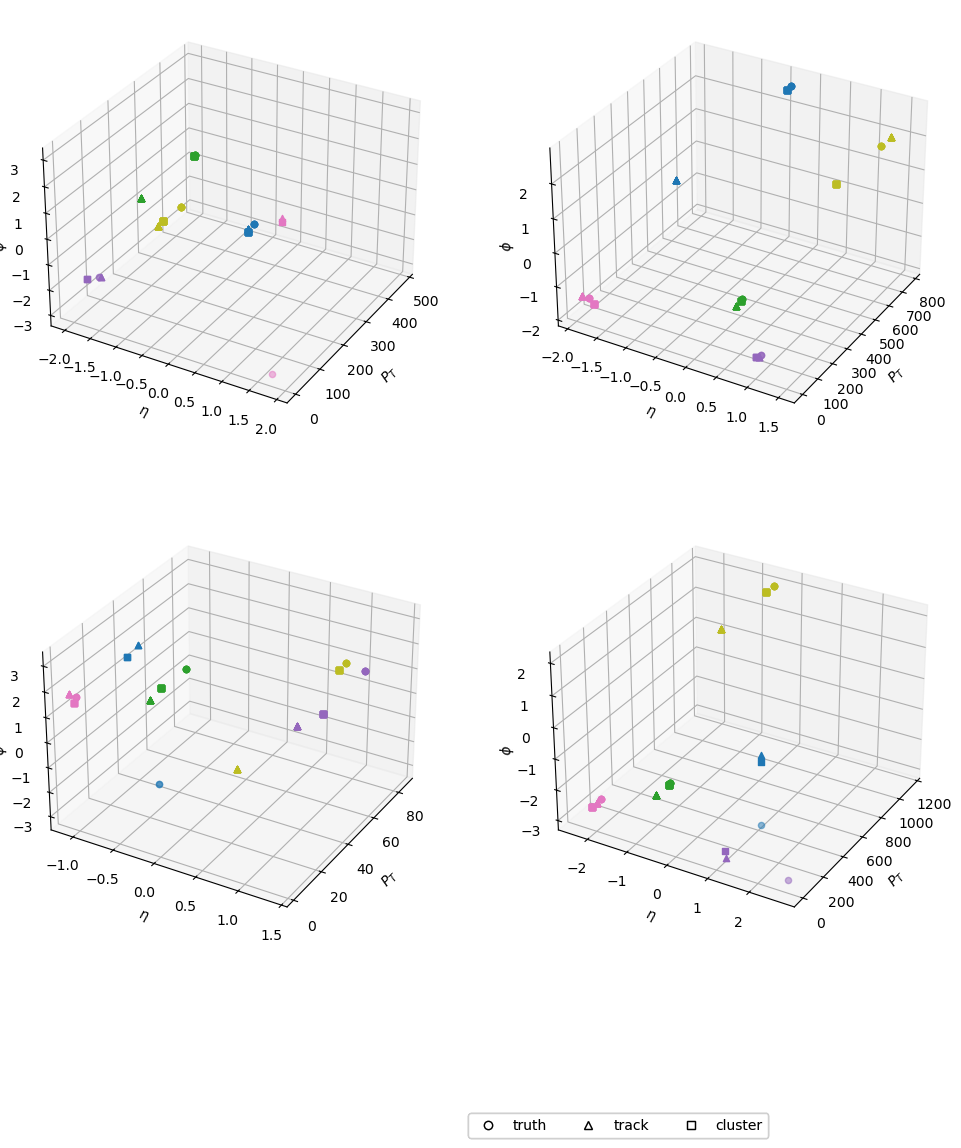

In [79]:
import matplotlib.pyplot as plt
import matplotlib
# from matplotlib import cm
from matplotlib.legend_handler import HandlerBase


class MarkerHandler(HandlerBase):

    def create_artists(self, legend, tup, xdescent, ydescent, width, height,
                       fontsize, trans):
        return [
            plt.Line2D([width / 2], [height / 2.],
                       ls="",
                       marker=tup[1],
                       fillstyle="none",
                       color=tup[0],
                       transform=trans)
        ]


N_EVENTS = 5

cmap = matplotlib.colormaps["tab20"]  #matplotlib.cm.get_cmap('tab20')
EVENT_COLORS = "red blue green black purple".split(" ")

fig = plt.figure(figsize=(12, 12))

sampled_events = []
for i in range(4):
    curr_sampled_events = np.random.choice(selected_events, size=N_EVENTS)
    sampled_events.append(curr_sampled_events)
    
    # plotting
    legend_markers = ["o", "^", "s"]
    legend_labels = ['truth', 'track', 'cluster']
    #     fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    # ax = fig.add_axes(MyAxes3D(ax, 'l'))

    for event_id, event_color in zip(curr_sampled_events,
                                     np.arange(0, 1, 1 / len(curr_sampled_events))):
        event_color = cmap(event_color)
        print(f"Inspecting event number: {event_id}")

        event_truth = truth_df[truth_df.eventNumber == event_id]
        event_track = track_df[track_df.eventNumber == event_id]
        event_cluster = cluster_df[cluster_df.eventNumber == event_id]

        for pdgid, eta, phi, Pt in zip(event_truth.truthPartPdgId,
                                       event_truth.truthPartEta,
                                       event_truth.truthPartPhi,
                                       event_truth.truthPartPt):
            #     plt.plot(eta, phi, marker='o', markersize=E, label=pdgid)
            ts = ax.scatter(eta,
                            Pt,
                            phi,
                            marker='o',
                            label="truth",
                            alpha=0.5,
                            color=event_color)
    #         ax.text(eta, Pt, phi, f"ev={event_id}\nid={pdgid}")
    #     plt.legend()

        for eta, phi, Pt in zip(event_track.trackEta, event_track.trackPhi,
                                event_track.trackPt):
            #     plt.plot(eta, phi, marker='x', markersize=s)
            ax.scatter(eta,
                       Pt,
                       phi,
                       marker='^',
                       label="track",
                       color=event_color)

        for eta, phi, Pt in zip(event_cluster.cluster_Eta,
                                event_cluster.cluster_Phi,
                                event_cluster.cluster_Pt):
            #     plt.plot(eta, phi, marker='s', markersize=s)
            ax.scatter(eta,
                       Pt,
                       phi,
                       marker='s',
                       label="cluster",
                       color=event_color)

    ax.set_xlabel('$\eta$')
    ax.set_ylabel('$P_T$')
    ax.set_zlabel('$\phi$', labelpad=-1)
    ax.zaxis._axinfo['juggled'] = (1, 2, 0)

    legend = ax.legend(
        list(zip(["black", "black", "black"], legend_markers)),
        legend_labels,
        handler_map={tuple: MarkerHandler()},
        loc="center left",
        #     bbox_to_anchor=(1.1, 0.5),
        bbox_transform=fig.transFigure,
        ncol=3,
        bbox_to_anchor=[0.5, -0.05],
        borderaxespad=0,
    )

plt.show()

Inspecting event number: 724790
Inspecting event number: 708703
Inspecting event number: 721361
Inspecting event number: 727539
Inspecting event number: 558070
Inspecting event number: 718172
Inspecting event number: 710371
Inspecting event number: 7403
Inspecting event number: 720512
Inspecting event number: 645832
Inspecting event number: 714311
Inspecting event number: 719091
Inspecting event number: 7415
Inspecting event number: 709299
Inspecting event number: 652459
Inspecting event number: 3275
Inspecting event number: 717488
Inspecting event number: 723604
Inspecting event number: 712057
Inspecting event number: 654828


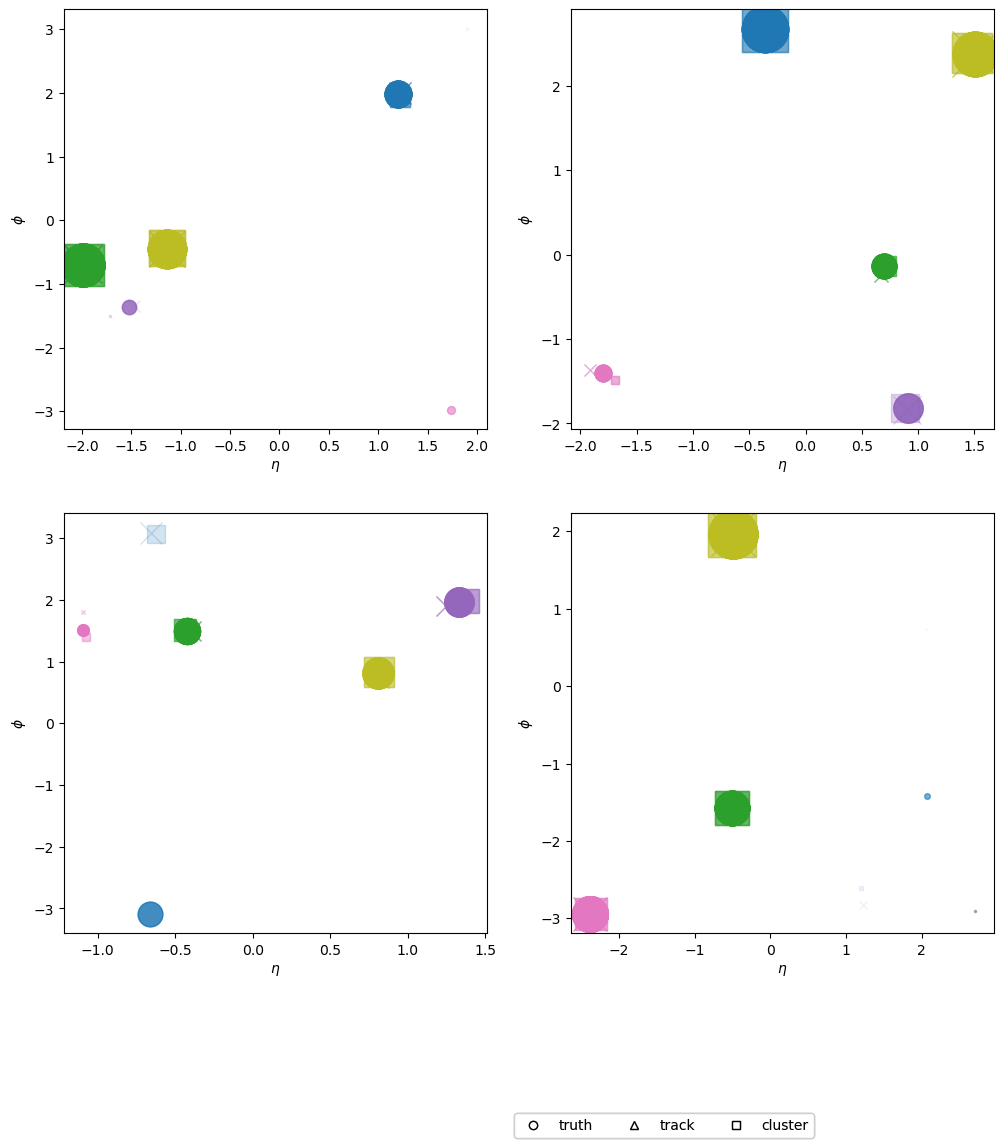

In [82]:
fig = plt.figure(figsize=(12, 12))

for i, curr_sampled_events in enumerate(sampled_events):

    # plotting
    ax = fig.add_subplot(2, 2, i + 1)

    for event_id, event_color in zip(curr_sampled_events,
                                     np.arange(0, 1, 1 / len(curr_sampled_events))):
        event_color = cmap(event_color)

        event_truth = truth_df[truth_df.eventNumber == event_id]
        event_track = track_df[track_df.eventNumber == event_id]
        event_cluster = cluster_df[cluster_df.eventNumber == event_id]

        for pdgid, eta, phi, Pt in zip(event_truth.truthPartPdgId,
                                       event_truth.truthPartEta,
                                       event_truth.truthPartPhi,
                                       event_truth.truthPartPt):
            plt.plot(eta,
                     phi,
                     marker='o',
                     markersize=np.log(Pt)*5,
                     label=pdgid,
                     color=event_color,
                     alpha=0.6)

        for eta, phi, Pt in zip(event_track.trackEta, event_track.trackPhi,
                                event_track.trackPt):
            plt.plot(eta,
                     phi,
                     marker='x',
                     markersize=np.log(Pt)*5,
                     label="track",
                     color=event_color,
                     alpha=0.1)

        for eta, phi, Pt in zip(event_cluster.cluster_Eta,
                                event_cluster.cluster_Phi,
                                event_cluster.cluster_Pt):
            plt.plot(eta,
                     phi,
                     marker='s',
                     markersize=np.log(Pt)*5,
                     color=event_color,
                     label="cluster",
                     alpha=0.1)

    ax.set_xlabel('$\eta$')
    ax.set_ylabel('$\phi$')
    #     ax.set_zlabel('$\phi$', labelpad=-1)
    #     ax.zaxis._axinfo['juggled'] = (1, 2, 0)

    legend = ax.legend(
        list(zip(["black", "black", "black"], legend_markers)),
        legend_labels,
        handler_map={tuple: MarkerHandler()},
        loc="center left",
        #     bbox_to_anchor=(1.1, 0.5),
        bbox_transform=fig.transFigure,
        ncol=3,
        bbox_to_anchor=[0.5, -0.05],
        borderaxespad=0,
    )

plt.show()

## Track matching efficiency

In [14]:
cluster_cols = [
    "cluster_E",
    "cluster_Pt",
    "cluster_Eta",
    "cluster_Phi",
    #     'cluster_cell_dR_min',
    #     'cluster_cell_dR_max',
    #     'cluster_cell_dEta_min',
    #     'cluster_cell_dEta_max',
    #     'cluster_cell_dPhi_min',
    #     'cluster_cell_dPhi_max',
    #     'm_cluster_cell_centerCellEta',
    #     'm_cluster_cell_centerCellPhi',
    #     'm_cluster_cell_centerCellLayer',
]

cluster_df = events[selected_cols[:1] + cluster_cols].explode(cluster_cols)

cluster_df

eventNumber  cluster_E  cluster_Pt  \
entry subentry subsubentry subsubsubentry                                       
1     0        0           0                      2006     4.7547      1.8501   
               1           0                      2006     4.7547      1.8501   
2     0        0           0                      2009    36.1139     14.1657   
                           1                      2009    36.1139     14.1657   
               1           0                      2009    36.1139     14.1657   
...                                                ...        ...         ...   
47282 0        1           1                    730641    66.2335     57.0186   
               2           0                    730641    66.2335     57.0186   
                           1                    730641    66.2335     57.0186   
                           2                    730641    66.2335     57.0186   
47283 0        0           0                    730623    55.7477     11.3283   

                                           cluster_Eta  cluster_Phi  
entry subentry subsubentry subsubsubentry                            
1     0        0           0                   -1.5968      -2.0150  
               1           0                   -1.5968      -2.0150  
2     0        0           0                    1.5881      -1.2018  
                           1                    1.5881      -1.2018  
               1           0                    1.5881      -1.2018  
...                                                ...          ...  
47282 0        1           1                   -0.5611       2.8779  
               2           0                   -0.5611       2.8779  
                           1                   -0.5611       2.8779  
                           2                   -0.5611       2.8779  
47283 0        0           0                   -2.2762      -2.9032  

[251113 rows x 5 columns]

In [15]:
single_track_events = track_df.query("eventNumber in @selected_events")
single_track_clusters = cluster_df.query("eventNumber in @selected_events")

In [16]:
print("Total tracks:", len(single_track_events))
print("Unique tracks:", len(single_track_events.eventNumber.unique()))
print("Total selected events", len(selected_events))

Total tracks: 175010
Unique tracks: 30640
Total selected events 30640


In [17]:
counts = single_track_events.eventNumber.value_counts()
multitracks = counts.index[counts > 1]

events.query("eventNumber in @multitracks")

eventNumber  nTruthPart  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                      2006           5   
               1           0                      2006           5   
2     0        0           0                      2009           5   
                           1                      2009           5   
               1           0                      2009           5   
...                                                ...         ...   
47282 0        1           0                    730641           5   
                           1                    730641           5   
               2           0                    730641           5   
                           1                    730641           5   
                           2                    730641           5   

                                           truthPartPdgId  truthPartStatus  \
entry subentry subsubentry subsubsubentry                                    
1     0        0           0                         -213                2   
               1           0                         -213                2   
2     0        0           0                          213                2   
                           1                          213                2   
               1           0                          213                2   
...                                                   ...              ...   
47282 0        1           0                          213                2   
                           1                          213                2   
               2           0                          213                2   
                           1                          213                2   
                           2                          213                2   

                                           truthPartPt  truthPartE  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                    5.0219     14.6175   
               1           0                    5.0219     14.6175   
2     0        0           0                   30.2001     75.4712   
                           1                   30.2001     75.4712   
               1           0                   30.2001     75.4712   
...                                                ...         ...   
47282 0        1           0                   92.4012    107.2752   
                           1                   92.4012    107.2752   
               2           0                   92.4012    107.2752   
                           1                   92.4012    107.2752   
                           2                   92.4012    107.2752   

                                           truthPartMass  truthPartEta  \
entry subentry subsubentry subsubsubentry                                
1     0        0           0                      2.0808       -1.7197   
               1           0                      2.0808       -1.7197   
2     0        0           0                      2.9907        1.5655   
                           1                      2.9907        1.5655   
               1           0                      2.9907        1.5655   
...                                                  ...           ...   
47282 0        1           0                      1.8531       -0.5598   
                           1                      1.8531       -0.5598   
               2           0                      1.8531       -0.5598   
                           1                      1.8531       -0.5598   
                           2                      1.8531       -0.5598   

                                           truthPartPhi  nTrack  trackPt  \
entry subentry subsubentry subsubsubentry                                  
1     0        0           0                    -1.7833       1   1.5815   
               

In [18]:
# events.query("eventNumber in @multitracks").to_csv("./results/multitracks.csv")

<div class="alert alert-block alert-warning">
    
Apparently selecting `nTrack==1` does not guarantee there is only a single track associated to the event!
    
For the moment we neglect those **6** records.
    
    This is probably also due to the replication of track records for multiple clusters. If we repeat this on the raw dataset we find only one track with more registerd Pt values.
</div>

##### Note: we are selecting only events with exactly one track and one cluster

In [19]:
refined_selection = list(set(selected_events).difference(
    set(multitracks)))  #[:10000]
# refined_selection = selected_events[:10000]

single_track_events = track_df.query("eventNumber in @refined_selection")
single_track_clusters = cluster_df.query("eventNumber in @refined_selection")

print("Total tracks:", len(single_track_events))
print("Unique tracks:", len(single_track_events.eventNumber.unique()))
print("Total selected events", len(refined_selection))

Total tracks: 6516
Unique tracks: 6516
Total selected events 6516


In [20]:
# def compute_phi_diff(x, y):
#     return pd.Series(np.minimum((2 * np.pi) - np.abs(x - y), np.abs(x - y)))
#     #return min((2 * np.pi) - abs(x - y), abs(x - y))

# R_thresh = 0.2

# # event_id = 3221919
# # N_matches = 0
# # single_track_events = track_df.groupby("eventNumber").first()
# for event_id in track_df.eventNumber.unique():

# association_df = track_df[track_df.eventNumber==event_id].merge(cluster_df[cluster_df.eventNumber==event_id], on="eventNumber")
# association_df["deltaEta"] = association_df.trackEta - association_df.clusterEta
# association_df["deltaPhi"] = compute_phi_diff(association_df.trackPhi, association_df.clusterPhi)

# association_df["deltaR"] = (association_df.deltaEta**2 + association_df.deltaPhi**2).apply(lambda x: np.sqrt(x))
# matched_track_df.loc[matched_track_df.eventNumber==event_id, "matching"] = (association_df.deltaR < R_thresh).any()

In [21]:
from tqdm import tqdm

tqdm.pandas()


def compute_phi_diff(x, y):
    return pd.Series(np.minimum((2 * np.pi) - np.abs(x - y), np.abs(x - y)))
    #return min((2 * np.pi) - abs(x - y), abs(x - y))


def check_deltaR(group_df, R_thresh=0.2):
    # Merge track to clusters for this eventNumber
    association_df = group_df.merge(single_track_clusters[
        single_track_clusters.eventNumber == group_df.eventNumber.values[0]],
                                    on="eventNumber")

    # Calculate deltaEta and deltaPhi
    association_df[
        "deltaEta"] = association_df.trackEta - association_df.cluster_Eta
    association_df["deltaPhi"] = compute_phi_diff(association_df.trackPhi,
                                                  association_df.cluster_Phi)

    # Calculate deltaR
    association_df["deltaR"] = (
        association_df.deltaEta**2 +
        association_df.deltaPhi**2).apply(lambda x: np.sqrt(x))

    # Check if any deltaR is less than threshold
    return (association_df.deltaR < R_thresh).any()


#     association_df["matching"] = association_df.deltaR < R_thresh
# #     return (association_df.deltaR < R_thresh).any()
#     return association_df

# Apply the function to each group of eventNumber
# selected_tracks = track_df[~track_df.trackPt.isna()].eventNumber
# selected_clusters = cluster_df[~cluster_df.clusterE.isna()].eventNumber
# selected_events = list(set(selected_tracks).intersection(selected_clusters))

matching_mask = single_track_events.groupby('eventNumber').progress_apply(
    check_deltaR)
single_track_events['matching'] = matching_mask.values

100%|██████████████████████████████████████| 6516/6516 [00:26<00:00, 243.02it/s]
/tmp/ipykernel_14900/1697596307.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_track_events['matching'] = matching_mask.values


In [23]:
single_track_events

,,,,eventNumber,trackPt,trackEta,trackPhi,matching
entry,subentry,subsubentry,subsubsubentry,,,,,
15,0,0,0,2022,6.5603,-0.0401,-0.3115,True
24,0,0,0,2031,1.2365,2.3940,-0.1140,False
29,0,0,0,2038,2.2241,-0.4266,-2.3867,True
38,0,0,0,2045,14.9860,1.0520,-0.4248,True
42,0,0,0,2049,0.8967,0.4888,-0.4991,False
...,...,...,...,...,...,...,...,...
47261,0,0,0,730633,7.6089,-0.0359,1.1989,True
47268,0,0,0,730639,1.7212,-0.0574,-0.2224,True
47271,0,0,0,730646,7.0145,1.0228,-1.4656,True


In [24]:
efficiency_plot_df = single_track_events.sort_values("trackPt")
efficiency_plot_df["efficiency"] = efficiency_plot_df.matching.cumsum() / len(
    efficiency_plot_df)
efficiency_plot_df

,,,,eventNumber,trackPt,trackEta,trackPhi,matching,efficiency
entry,subentry,subsubentry,subsubsubentry,,,,,,
10016,0,0,0,645611,0.5003,0.4110,2.0160,False,0.0000
35614,0,0,0,717317,0.5052,-2.2241,-1.8352,True,0.0002
20705,0,0,0,710051,0.5088,0.3013,-2.6137,False,0.0002
492,0,0,0,5660,0.5099,1.9862,-0.2235,False,0.0002
11173,0,0,0,653651,0.5188,-1.2334,-2.5657,True,0.0003
...,...,...,...,...,...,...,...,...,...
8793,0,0,0,257579,438.5115,-0.3529,2.0260,True,0.6677
27998,0,0,0,711320,438.6483,1.0095,-2.9247,False,0.6677
41036,0,0,0,732034,443.5277,-2.3235,1.1543,True,0.6679


Text(0.5, 1.0, 'Track to cluster matching efficiency')

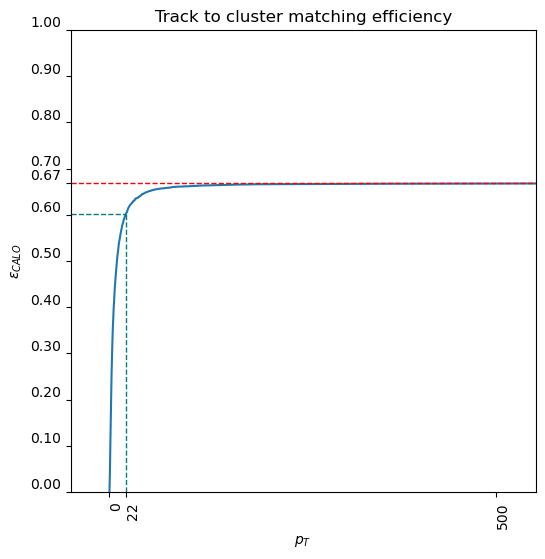

In [85]:
qq = 0.9
acceptable_efficiency_threshold = efficiency_plot_df.efficiency.max() * qq
pt_threshold = efficiency_plot_df.trackPt.iloc[[
    np.where(
        efficiency_plot_df.efficiency > acceptable_efficiency_threshold)[0][0]
]]
# efficiency_plot_df.efficiency.quantile(qq)

xmin, xmax = efficiency_plot_df.trackPt.min(
) - 50, efficiency_plot_df.trackPt.max()/2
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(efficiency_plot_df.trackPt, efficiency_plot_df.efficiency)
ax.vlines(x=[pt_threshold],
          ymin=[0],
          ymax=[acceptable_efficiency_threshold],
          colors='teal',
          ls='--',
          lw=1,
          label=f'{qq*100:2.2f}% of best efficiency')
ax.hlines(
    y=[acceptable_efficiency_threshold,
       efficiency_plot_df.efficiency.max()],
    xmin=[xmin, xmin],
    xmax=[pt_threshold, efficiency_plot_df.trackPt.max()],
    colors=['teal', "red"],
    ls='--',
    lw=1,
)

# plt.xticks(list(plt.xticks()[0]) +  [pt_threshold.values[0]])
plt.xticks([0, pt_threshold.values[0], 500, 1000, 2000, 3000, 4000, 5000],
           rotation=90,
           ha='left')

y_ticks = np.unique(
    np.round(
        [*np.arange(0, 1.01, 0.1)] +
        [acceptable_efficiency_threshold,
         efficiency_plot_df.efficiency.max()], 2))
plt.yticks(np.sort(y_ticks), va="bottom")

ax.set_xlim(xmin, xmax+1)
ax.set_ylim(0, 1)
ax.set_xlabel("$p_T$")
ax.set_ylabel("$\epsilon_{CALO}$")
plt.title("Track to cluster matching efficiency")

# Analysis/Modeling
Do work here

Now we try to quantify the correlations among observables that we know should be related for physics arguments. Namely, we inspect the following relationships:

 - `ClusterE` VS `ClusterECalib` in *ClusterTree*
 - `ClusterE` - `ClusterECalib` VS `cluster_EM_PROBABILITY`
 - `truthPt` VS `trackPt` VS `clusterPt`


In [43]:
events

eventNumber  nTruthPart  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                      2006           5   
               1           0                      2006           5   
2     0        0           0                      2009           5   
                           1                      2009           5   
               1           0                      2009           5   
...                                                ...         ...   
47282 0        1           1                    730641           5   
               2           0                    730641           5   
                           1                    730641           5   
                           2                    730641           5   
47283 0        0           0                    730623           5   

                                           truthPartPdgId  truthPartStatus  \
entry subentry subsubentry subsubsubentry                                    
1     0        0           0                         -213                2   
               1           0                         -213                2   
2     0        0           0                          213                2   
                           1                          213                2   
               1           0                          213                2   
...                                                   ...              ...   
47282 0        1           1                          213                2   
               2           0                          213                2   
                           1                          213                2   
                           2                          213                2   
47283 0        0           0                          213                2   

                                           truthPartPt  truthPartE  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                    5.0219     14.6175   
               1           0                    5.0219     14.6175   
2     0        0           0                   30.2001     75.4712   
                           1                   30.2001     75.4712   
               1           0                   30.2001     75.4712   
...                                                ...         ...   
47282 0        1           1                   92.4012    107.2752   
               2           0                   92.4012    107.2752   
                           1                   92.4012    107.2752   
                           2                   92.4012    107.2752   
47283 0        0           0                   25.6338    123.9855   

                                           truthPartMass  truthPartEta  \
entry subentry subsubentry subsubsubentry                                
1     0        0           0                      2.0808       -1.7197   
               1           0                      2.0808       -1.7197   
2     0        0           0                      2.9907        1.5655   
                           1                      2.9907        1.5655   
               1           0                      2.9907        1.5655   
...                                                  ...           ...   
47282 0        1           1                      1.8531       -0.5598   
               2           0                      1.8531       -0.5598   
                           1                      1.8531       -0.5598   
                           2                      1.8531       -0.5598   
47283 0        0           0                      4.1978       -2.2580   

                                           truthPartPhi  nTrack  trackPt  \
entry subentry subsubentry subsubsubentry                                  
1     0        0           0                    -1.7833       1   1.5815   
               

In [44]:
cluster_cols = [
    #     'runNumber', # always constant
    'eventNumber',
    'truthE',
    'truthPt',
    'truthEta',
    'truthPhi',
    #     'clusterIndex',
    'nCluster',
    'cluster_E',
    'cluster_E_LCCalib',  # 'clusterECalib',
    'cluster_Pt',
    'cluster_Eta',
    'cluster_Phi',
    'cluster_nCells',
    #     'cluster_sumCellE',
    'cluster_EM_PROBABILITY',
    #     'cluster_cell_dR_min',
    #     'cluster_cell_dR_max',
    #     'cluster_cell_dEta_min',
    #     'cluster_cell_dEta_max',
    #     'cluster_cell_dPhi_min',
    #     'cluster_cell_dPhi_max',
]

clusters = events[
    selected_cols]  # chunk_data["ClusterTree"].arrays(cluster_cols, library="pd")
clusters.head(10)

eventNumber  nTruthPart  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                      2006           5   
               1           0                      2006           5   
2     0        0           0                      2009           5   
                           1                      2009           5   
               1           0                      2009           5   
               2           0                      2009           5   
5     0        0           0                      2002           5   
                           1                      2002           5   
               1           0                      2002           5   
                           1                      2002           5   

                                           truthPartPdgId  truthPartStatus  \
entry subentry subsubentry subsubsubentry                                    
1     0        0           0                         -213                2   
               1           0                         -213                2   
2     0        0           0                          213                2   
                           1                          213                2   
               1           0                          213                2   
               2           0                          213                2   
5     0        0           0                         -213                2   
                           1                         -213                2   
               1           0                         -213                2   
                           1                         -213                2   

                                           truthPartPt  truthPartE  \
entry subentry subsubentry subsubsubentry                            
1     0        0           0                    5.0219     14.6175   
               1           0                    5.0219     14.6175   
2     0        0           0                   30.2001     75.4712   
                           1                   30.2001     75.4712   
               1           0                   30.2001     75.4712   
               2           0                   30.2001     75.4712   
5     0        0           0                   88.7940    210.1857   
                           1                   88.7940    210.1857   
               1           0                   88.7940    210.1857   
                           1                   88.7940    210.1857   

                                           truthPartMass  truthPartEta  \
entry subentry subsubentry subsubsubentry                                
1     0        0           0                      2.0808       -1.7197   
               1           0                      2.0808       -1.7197   
2     0        0           0                      2.9907        1.5655   
                           1                      2.9907        1.5655   
               1           0                      2.9907        1.5655   
               2           0                      2.9907        1.5655   
5     0        0           0                      1.2231       -1.5069   
                           1                      1.2231       -1.5069   
               1           0                      1.2231       -1.5069   
                           1                      1.2231       -1.5069   

                                           truthPartPhi  nTrack  trackPt  \
entry subentry subsubentry subsubsubentry                                  
1     0        0           0                    -1.7833       1   1.5815   
               1           0                    -1.7833       1   1.5815   
2     0        0           0                    -1.2393       1  22.6757   
                           1                    -1.2393       1  22.6757   
               1           0                    -1.2393       1  22.6757   
   

## `ClusterE` VS `ClusterECalib` correlation

Text(0.5, 1.0, 'Cluster energy VS calibrated energy')

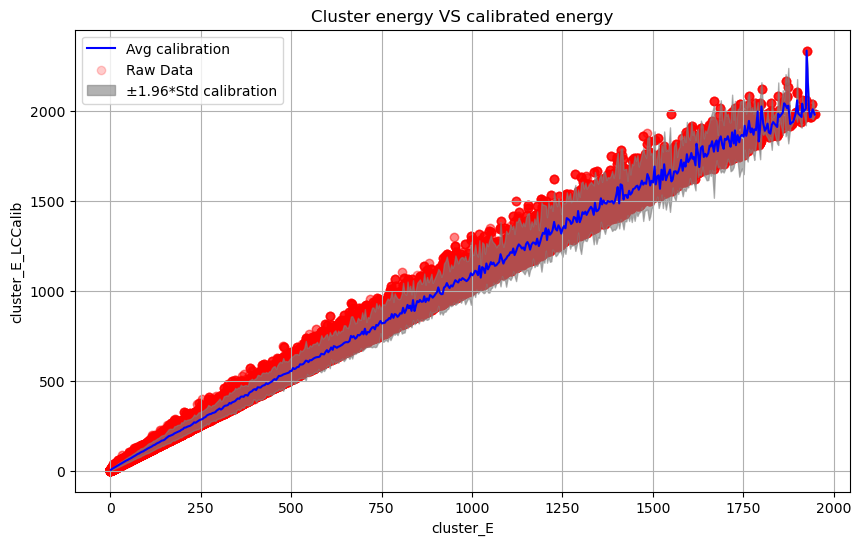

In [45]:
z_alpha2 = 1.96
plot_df = clusters[["cluster_E", "cluster_E_LCCalib"]].sort_values("cluster_E")

# Binning the data
num_bins = 500  # You can adjust the number of bins as needed
bins = np.linspace(plot_df["cluster_E"].min(), plot_df["cluster_E"].max(),
                   num_bins)
plot_df['bin'] = np.digitize(plot_df["cluster_E"], bins)

# Aggregating data within each bin
agg_plot_df = plot_df.groupby('bin').agg({
    "cluster_E": 'mean',
    "cluster_E_LCCalib": ['mean', 'std']
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(agg_plot_df["cluster_E"],
         agg_plot_df["cluster_E_LCCalib"]['mean'],
         color='blue',
         label='Avg calibration')
plt.scatter(plot_df["cluster_E"],
            plot_df["cluster_E_LCCalib"],
            color='red',
            alpha=0.2,
            label='Raw Data')
plt.fill_between(list(agg_plot_df["cluster_E"].values.flatten()),
                 agg_plot_df["cluster_E_LCCalib"]['mean'] -
                 z_alpha2 * agg_plot_df["cluster_E_LCCalib"]['std'],
                 agg_plot_df["cluster_E_LCCalib"]['mean'] +
                 z_alpha2 * agg_plot_df["cluster_E_LCCalib"]['std'],
                 color='gray',
                 alpha=0.6,
                 label=f'±{z_alpha2}*Std calibration')

plt.legend()
plt.grid(True)
plt.xlabel("cluster_E")
plt.ylabel("cluster_E_LCCalib")
plt.title('Cluster energy VS calibrated energy')

In [46]:
# Pearson correlation: linear
clusters[["cluster_E", "cluster_E_LCCalib"]].corr("pearson")

,cluster_E,cluster_E_LCCalib
cluster_E,1.0000,0.9972
cluster_E_LCCalib,0.9972,1.0000


In [47]:
# Spearman correlation: monotonic
clusters[["cluster_E", "cluster_E_LCCalib"]].corr("spearman")

,cluster_E,cluster_E_LCCalib
cluster_E,1.0000,0.9981
cluster_E_LCCalib,0.9981,1.0000


In [48]:
# Kendall correlation: ordering
clusters[["cluster_E", "cluster_E_LCCalib"]].corr("kendall")

,cluster_E,cluster_E_LCCalib
cluster_E,1.0000,0.9621
cluster_E_LCCalib,0.9621,1.0000


## `ClusterE` - `ClusterECalib` VS `cluster_EM_PROBABILITY` correlation

/tmp/ipykernel_14900/758715833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["calibDiff"] = clusters.cluster_E_LCCalib - clusters.cluster_E


Text(0.5, 1.0, 'EM probability VS calibration difference')

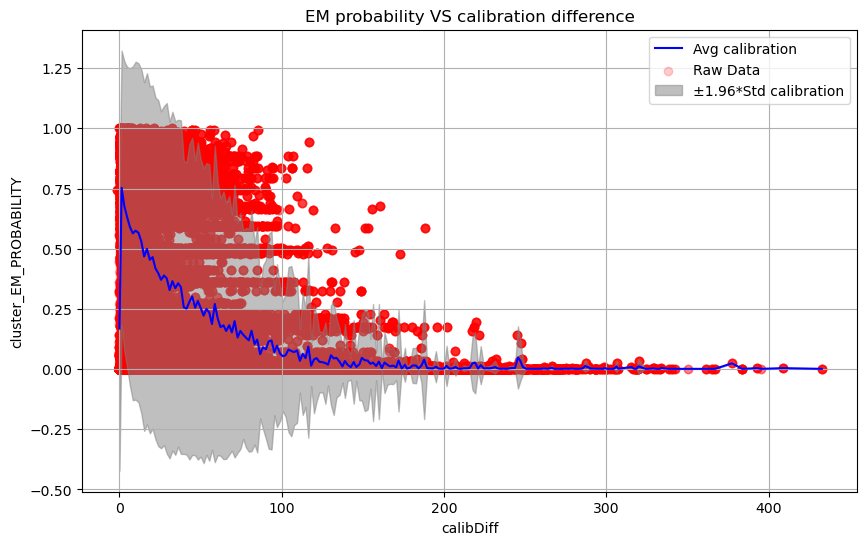

In [49]:
plot_df = clusters[["cluster_EM_PROBABILITY"]]
plot_df["calibDiff"] = clusters.cluster_E_LCCalib - clusters.cluster_E
plot_df = plot_df.sort_values("calibDiff")

# Binning the data
num_bins = 250  # You can adjust the number of bins as needed
bins = np.linspace(plot_df["calibDiff"].min(), plot_df["calibDiff"].max(),
                   num_bins)
plot_df['bin'] = np.digitize(plot_df["calibDiff"], bins)

# Aggregating data within each bin
agg_plot_df = plot_df.groupby('bin').agg({
    "calibDiff":
    'mean',
    "cluster_EM_PROBABILITY": ['mean', 'std']
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(agg_plot_df["calibDiff"],
         agg_plot_df["cluster_EM_PROBABILITY"]['mean'],
         color='blue',
         label='Avg calibration')
plt.scatter(plot_df["calibDiff"],
            plot_df["cluster_EM_PROBABILITY"],
            color='red',
            alpha=0.2,
            label='Raw Data')
plt.fill_between(list(agg_plot_df["calibDiff"].values.flatten()),
                 agg_plot_df["cluster_EM_PROBABILITY"]['mean'] -
                 z_alpha2 * agg_plot_df["cluster_EM_PROBABILITY"]['std'],
                 agg_plot_df["cluster_EM_PROBABILITY"]['mean'] +
                 z_alpha2 * agg_plot_df["cluster_EM_PROBABILITY"]['std'],
                 color='gray',
                 alpha=0.5,
                 label=f'±{z_alpha2}*Std calibration')

plt.legend()
plt.grid(True)
plt.xlabel("calibDiff")
plt.ylabel("cluster_EM_PROBABILITY")
plt.title('EM probability VS calibration difference')

In [50]:
# Pearson correlation: linear
plot_df.corr(method="pearson")

,cluster_EM_PROBABILITY,calibDiff,bin
cluster_EM_PROBABILITY,1.0000,-0.4761,-0.4760
calibDiff,-0.4761,1.0000,0.9999
bin,-0.4760,0.9999,1.0000


In [51]:
# Spearman correlation: monotonic
plot_df.corr(method="spearman")

,cluster_EM_PROBABILITY,calibDiff,bin
cluster_EM_PROBABILITY,1.0000,-0.5032,-0.5032
calibDiff,-0.5032,1.0000,0.9989
bin,-0.5032,0.9989,1.0000


In [52]:
# Kendall correlation: ordering
plot_df.corr(method="kendall")

,cluster_EM_PROBABILITY,calibDiff,bin
cluster_EM_PROBABILITY,1.0000,-0.3489,-0.3553
calibDiff,-0.3489,1.0000,0.9814
bin,-0.3553,0.9814,1.0000


## `trackPt` VS `total_matched_clusterPt`

In [54]:
def track_to_cluster_matching(group_df, R_thresh=0.2):
    # Merge track to clusters for this eventNumber
    association_df = group_df.merge(single_track_clusters[
        single_track_clusters.eventNumber == group_df.eventNumber.values[0]],
                                    on="eventNumber")
    association_df.drop("eventNumber", axis=1, inplace=True)

    # Calculate deltaEta and deltaPhi
    association_df[
        "deltaEta"] = association_df.trackEta - association_df.cluster_Eta
    association_df["deltaPhi"] = compute_phi_diff(association_df.trackPhi,
                                                  association_df.cluster_Phi)

    # Calculate deltaR
    association_df["deltaR"] = (
        association_df.deltaEta**2 +
        association_df.deltaPhi**2).apply(lambda x: np.sqrt(x))

    # Check if any deltaR is less than threshold
    association_df["matching_cluster"] = association_df.deltaR < R_thresh
    return association_df


# Apply the function to each group of eventNumber
# selected_tracks = track_df[~track_df.trackPt.isna()].eventNumber
# selected_clusters = cluster_df[~cluster_df.clusterE.isna()].eventNumber
# selected_events = list(set(selected_tracks).intersection(selected_clusters))

association_df = single_track_events.iloc[:1000].groupby(
    'eventNumber').progress_apply(track_to_cluster_matching)
association_df

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 280.36it/s]


,,trackPt,trackEta,trackPhi,matching,cluster_E,cluster_Pt,cluster_Eta,cluster_Phi,deltaEta,deltaPhi,deltaR,matching_cluster
eventNumber,,,,,,,,,,,,,
2022,0,6.5603,-0.0401,-0.3115,True,4.5951,4.5897,-0.0485,-0.2154,0.0084,0.0961,0.0965,True
2031,0,1.2365,2.3940,-0.1140,False,5.6751,2.5881,1.4217,-2.0244,0.9722,1.9104,2.1436,False
2038,0,2.2241,-0.4266,-2.3867,True,0.7426,0.6913,-0.3832,-2.2124,-0.0434,0.1743,0.1797,True
2045,0,14.9860,1.0520,-0.4248,True,10.1629,6.2436,1.0689,-0.4539,-0.0169,0.0290,0.0336,True
2049,0,0.8967,0.4888,-0.4991,False,1.1237,0.3806,1.7457,-0.8427,-1.2569,0.3436,1.3030,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634368,0,2.3131,-1.6226,-1.3509,True,1.6975,1.6961,0.0401,-0.0584,-1.6627,1.2925,2.1059,False
634373,0,1.9005,-1.9901,1.7372,True,7.3880,2.0588,-1.9509,1.6265,-0.0392,0.1107,0.1174,True
634390,0,155.5778,0.0035,-2.5148,True,130.7531,130.7271,-0.0199,-2.5090,0.0234,0.0059,0.0242,True


In [55]:
plot_df = association_df.groupby("eventNumber").first()[["trackPt"]]
plot_df

,trackPt
eventNumber,
2022,6.5603
2031,1.2365
2038,2.2241
2045,14.9860
2049,0.8967
...,...
634368,2.3131
634373,1.9005
634390,155.5778


Text(0.5, 1.0, 'track VS matching clusters momentum')

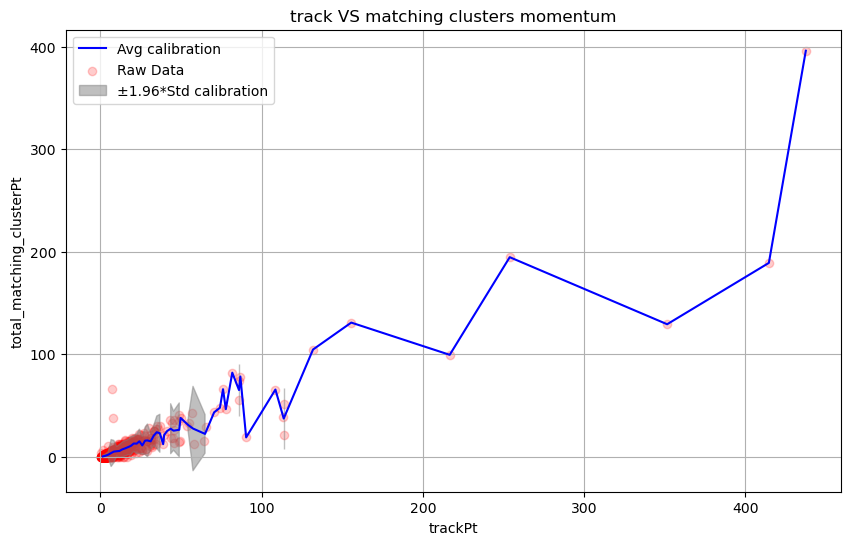

In [57]:
plot_df = association_df.groupby("eventNumber").first()[["trackPt"]]
plot_df["total_matching_clusterPt"] = association_df.groupby(
    'eventNumber').apply(
        lambda x: (x['cluster_Pt'] * x['matching_cluster']).sum()).values
# plot_df = plot_df.sort_values("trackPt")

# Binning the data
num_bins = 250  # You can adjust the number of bins as needed
bins = np.linspace(plot_df["trackPt"].min(), plot_df["trackPt"].max(),
                   num_bins)
plot_df['bin'] = np.digitize(plot_df["trackPt"], bins)

# Aggregating data within each bin
agg_plot_df = plot_df.groupby('bin').agg({
    "trackPt":
    'mean',
    "total_matching_clusterPt": ['mean', 'std']
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(agg_plot_df["trackPt"],
         agg_plot_df["total_matching_clusterPt"]['mean'],
         color='blue',
         label='Avg calibration')
plt.scatter(plot_df["trackPt"],
            plot_df["total_matching_clusterPt"],
            color='red',
            alpha=0.2,
            label='Raw Data')
plt.fill_between(list(agg_plot_df["trackPt"].values.flatten()),
                 agg_plot_df["total_matching_clusterPt"]['mean'] -
                 z_alpha2 * agg_plot_df["total_matching_clusterPt"]['std'],
                 agg_plot_df["total_matching_clusterPt"]['mean'] +
                 z_alpha2 * agg_plot_df["total_matching_clusterPt"]['std'],
                 color='gray',
                 alpha=0.5,
                 label=f'±{z_alpha2}*Std calibration')

plt.legend()
plt.grid(True)
plt.xlabel("trackPt")
plt.ylabel("total_matching_clusterPt")
plt.title('track VS matching clusters momentum')
# plt.xlim(0, 2000)

In [58]:
# Pearson correlation: linear
plot_df.query("trackPt < 150").corr(method="pearson")

,trackPt,total_matching_clusterPt,bin
trackPt,1.0000,0.8728,0.9993
total_matching_clusterPt,0.8728,1.0000,0.8722
bin,0.9993,0.8722,1.0000


In [59]:
plot_df.corr(method="pearson")

,trackPt,total_matching_clusterPt,bin
trackPt,1.0000,0.9214,0.9998
total_matching_clusterPt,0.9214,1.0000,0.9218
bin,0.9998,0.9218,1.0000


In [60]:
# Spearman correlation: monotonic
plot_df.query("trackPt < 150").corr(method="spearman")

,trackPt,total_matching_clusterPt,bin
trackPt,1.0000,0.8580,0.9857
total_matching_clusterPt,0.8580,1.0000,0.8528
bin,0.9857,0.8528,1.0000


In [61]:
# Kendall correlation: ordering
plot_df.query("trackPt < 150").corr(method="kendall")

,trackPt,total_matching_clusterPt,bin
trackPt,1.0000,0.7051,0.9276
total_matching_clusterPt,0.7051,1.0000,0.7346
bin,0.9276,0.7346,1.0000


# Results
Show graphs and stats here

# Open Points and Future Work
Summarize findings here